# Individual Algo Weak Scaling (Thread numbers on same plot) 

In [1]:
import sys
sys.path.append("/scratch/group/csce435-f23/python-3.8.17/lib/python3.8/site-packages")
sys.path.append("/scratch/group/csce435-f23/thicket")
from glob import glob

import matplotlib.pyplot as plt
import pandas as pd

import thicket as th

pd.set_option("display.max_rows", None)
pd.set_option("display.max_columns", None)

Read in all the files

In [2]:
tk = th.Thicket.from_caliperreader(glob("cali_files/roee/*.cali"))
tk.dataframe = tk.dataframe.drop(["nid", "spot.channel", "Total time"], axis=1)

In [3]:
# Performance data
tk.dataframe

Min time/rank  \
node                                              profile                     
{'name': 'main', 'type': 'function'}              7889210        284.700548   
                                                  12367584        15.644663   
                                                  35225943         0.024514   
                                                  35646464         2.625594   
                                                  41684191         7.619610   
                                                  52788373      1980.302303   
                                                  55578322         1.388426   
                                                  85913000         0.754029   
                                                  91204238         0.679221   
                                                  114393497        2.948187   
                                                  129941946        5.164360   
                                                  154171129        1.144371   
                                                  162888901     3328.373696   
                                                  234134295        9.533900   
                                                  264533472      267.523447   
                                                  399583654      207.028604   
                                                  431974227      292.539192   
                                                  442998178     2371.954269   
                                                  459842825     4568.022432   
                                                  461579471     2594.477296   
                                                  552341693        1.141405   
                                                  576967359      382.772719   
                                                  595592607        2.667785   
                                                  693901349        2.296861   
                                                  737222405     2470.648388   
                                                  794419592        0.044404   
                                                  803176683        2.256454   
                                                  941853197        2.262650   
                                                  944418166       10.151916   
                                                  1025902469       2.321344   
                                                  1093749272      17.693142   
                                                  1136933894     209.905805   
                                                  1211359881       0.072596   
                                                  1247997927    3429.871880   
                                                  1254725690    3224.808611   
                                                  1275753510       0.001669   
                                                  1281487018    4720.204189   
                                                  1301913435       0.802393   
                                                  1314796006      18.263462   
                                                  1319210817      17.956176   
                                                  1371600987      12.969012   
                                                  1385773059       2.578823   
                                                  1398480090      17.140277   
                                                  1417248272    3532.919358   
                                                  1435459564       0.292084   
                                                  1439231101       0.899907   
                                                  1472774536       2.431903   
                                                  1522765513      65.925327   
                                                  1531267446       2.703449   
                                 

Groupby matrix size argument, available in the metadata (tk.metadata) to organize our performance data into 3 groupings.

In [4]:
tk.statsframe.dataframe["time"]= 1
print(tk.tree())

  _____ _     _      _        _   
 |_   _| |__ (_) ___| | _____| |_ 
   | | | '_ \| |/ __| |/ / _ \ __|
   | | | | | | | (__|   <  __/ |_ 
   |_| |_| |_|_|\___|_|\_\___|\__|  v2023.3.0

1.000 main
├─ 1.000 comm
│  └─ 1.000 comm_small
│     ├─ 1.000 MPI_Recv
│     └─ 1.000 MPI_Send
├─ 1.000 comp
│  ├─ 1.000 comp_large
│  └─ 1.000 comp_small
├─ 1.000 correctness_check
└─ 1.000 data_init

Legend (Metric: time Min: 1.00 Max: 1.00)
█ 1.00 - 1.00
█ 1.00 - 1.00
█ 1.00 - 1.00
█ 1.00 - 1.00
█ 1.00 - 1.00
█ 1.00 - 1.00

name User code    ◀  Only in left graph    ▶  Only in right graph



In [5]:
tk.metadata

,cali.caliper.version,mpi.world.size,spot.metrics,spot.timeseries.metrics,spot.format.version,spot.options,spot.channels,cali.channel,spot:node.order,spot:output,spot:time.variance,correctness,launchdate,libraries,cmdline,cluster,Algorithm,ProgrammingModel,Datatype,SizeOfDatatype,InputSize,InputType,num_procs,num_threads,group_num,implementation_source
profile,,,,,,,,,,,,,,,,,,,,,,,,,,
7889210,2.11.0-dev,2,"min#inclusive#sum#time.duration,max#inclusive#...",,2,"time.variance,node.order",regionprofile,spot,true,262144-2-3-bubble.cali,true,success,1700071209,[/scratch/group/csce435-f23/Caliper/caliper/li...,"[./bubble_sort, 262144, 3]",c,Bubble Sort(Odd/Even),MPI,int,4,262144,Random,2,0,14,Handwritten
12367584,2.11.0-dev,1024,"min#inclusive#sum#time.duration,max#inclusive#...",,2,"time.variance,node.order",regionprofile,spot,true,262144-1024-1-bubble.cali,true,success,1700078542,[/scratch/group/csce435-f23/Caliper/caliper/li...,"[./bubble_sort, 262144, 1]",c,Bubble Sort(Odd/Even),MPI,int,4,262144,ReverseSorted,1024,0,14,Handwritten
35225943,2.11.0-dev,32,"min#inclusive#sum#time.duration,max#inclusive#...",,2,"time.variance,node.order",regionprofile,spot,true,262144-32-0-bubble.cali,true,success,1700078301,[/scratch/group/csce435-f23/Caliper/caliper/li...,"[./bubble_sort, 262144, 0]",c,Bubble Sort(Odd/Even),MPI,int,4,262144,Sorted,32,0,14,Handwritten
35646464,2.11.0-dev,1024,"min#inclusive#sum#time.duration,max#inclusive#...",,2,"time.variance,node.order",regionprofile,spot,true,65536-1024-0-bubble.cali,true,success,1700077739,[/scratch/group/csce435-f23/Caliper/caliper/li...,"[./bubble_sort, 65536, 0]",c,Bubble Sort(Odd/Even),MPI,int,4,65536,Sorted,1024,0,14,Handwritten
41684191,2.11.0-dev,4,"min#inclusive#sum#time.duration,max#inclusive#...",,2,"time.variance,node.order",regionprofile,spot,true,65536-4-2-bubble.cali,true,success,1700071181,[/scratch/group/csce435-f23/Caliper/caliper/li...,"[./bubble_sort, 65536, 2]",c,Bubble Sort(Odd/Even),MPI,int,4,65536,1 perturbed,4,0,14,Handwritten
52788373,2.11.0-dev,4,"min#inclusive#sum#time.duration,max#inclusive#...",,2,"time.variance,node.order",regionprofile,spot,true,1048576-4-2-bubble.cali,true,success,1700072411,[/scratch/group/csce435-f23/Caliper/caliper/li...,"[./bubble_sort, 1048576, 2]",c,Bubble Sort(Odd/Even),MPI,int,4,1048576,1 perturbed,4,0,14,Handwritten
55578322,2.11.0-dev,32,"min#inclusive#sum#time.duration,max#inclusive#...",,2,"time.variance,node.order",regionprofile,spot,true,65536-32-3-bubble.cali,true,success,1700077798,[/scratch/group/csce435-f23/Caliper/caliper/li...,"[./bubble_sort, 65536, 3]",c,Bubble Sort(Odd/Even),MPI,int,4,65536,Random,32,0,14,Handwritten
85913000,2.11.0-dev,64,"min#inclusive#sum#time.duration,max#inclusive#...",,2,"time.variance,node.order",regionprofile,spot,true,65536-64-2-bubble.cali,true,success,1700077784,[/scratch/group/csce435-f23/Caliper/caliper/li...,"[./bubble_sort, 65536, 2]",c,Bubble Sort(Odd/Even),MPI,int,4,65536,1 perturbed,64,0,14,Handwritten
91204238,2.11.0-dev,512,"min#inclusive#sum#time.duration,max#inclusive#...",,2,"time.variance,node.order",regionprofile,spot,true,65536-512-0-bubble.cali,true,success,1700077738,[/scratch/group/csce435-f23/Caliper/caliper/li...,"[./bubble_sort, 65536, 0]",c,Bubble Sort(Odd/Even),MPI,int,4,65536,Sorted,512,0,14,Handwritten


In [6]:
gb = tk.groupby("InputType")
print(gb.keys())
allthickets = list(gb.values())
inputsorted = gb['Sorted'].groupby("num_procs")
inputreversed = gb['ReverseSorted'].groupby("num_procs")
inputrandom = gb['Random'].groupby("num_procs")
inputperturbed = gb['1 perturbed'].groupby("num_procs")

4  thickets created...
{'1 perturbed': <thicket.thicket.Thicket object at 0x2b8cf4a07b20>, 'Random': <thicket.thicket.Thicket object at 0x2b8cf4b50f70>, 'ReverseSorted': <thicket.thicket.Thicket object at 0x2b8cf4ab8430>, 'Sorted': <thicket.thicket.Thicket object at 0x2b8cf4afae50>}
dict_keys(['1 perturbed', 'Random', 'ReverseSorted', 'Sorted'])
10  thickets created...
{2: <thicket.thicket.Thicket object at 0x2b8cf4ab8c40>, 4: <thicket.thicket.Thicket object at 0x2b8cf4975730>, 8: <thicket.thicket.Thicket object at 0x2b8cf4a6ab50>, 16: <thicket.thicket.Thicket object at 0x2b8cf4a3f070>, 32: <thicket.thicket.Thicket object at 0x2b8cf4ac1790>, 64: <thicket.thicket.Thicket object at 0x2b8cf4c94670>, 128: <thicket.thicket.Thicket object at 0x2b8cf4b62130>, 256: <thicket.thicket.Thicket object at 0x2b8cf4987190>, 512: <thicket.thicket.Thicket object at 0x2b8cf4ad77f0>, 1024: <thicket.thicket.Thicket object at 0x2b8cf4b9aa30>}
10  thickets created...
{2: <thicket.thicket.Thicket object at 0x

Compose these 3 groups column-wise to get a holistic view of the data

In [7]:
ctksorted = th.Thicket.concat_thickets(
    thickets=list(inputsorted.values()),
    headers=list(inputsorted.keys()),
    axis="columns",
    metadata_key="InputSize"
)

ctkreversed = th.Thicket.concat_thickets(
    thickets=list(inputreversed.values()),
    headers=list(inputreversed.keys()),
    axis="columns",
    metadata_key="InputSize"
)

ctkperturbed = th.Thicket.concat_thickets(
    thickets=list(inputperturbed.values()),
    headers=list(inputperturbed.keys()),
    axis="columns",
    metadata_key="InputSize"
)

ctkrandom = th.Thicket.concat_thickets(
    thickets=list(inputrandom.values()),
    headers=list(inputrandom.keys()),
    axis="columns",
    metadata_key="InputSize"
)



allctk = []
allctk.append(ctksorted)
allctk.append(ctkreversed)
allctk.append(ctkperturbed)
allctk.append(ctkrandom)

In [8]:
for ctk in allctk:
    display(ctk.dataframe)

2  \
                                                            Min time/rank   
node                                              InputSize                 
{'name': 'main', 'type': 'function'}              65536          0.001669   
                                                  262144         0.004282   
                                                  1048576        0.015861   
                                                  4194304        0.056925   
                                                  16777216       0.224419   
                                                  67108864       0.893507   
                                                  268435456      3.588849   
{'name': 'comm', 'type': 'function'}              65536          0.000697   
                                                  262144         0.000765   
                                                  1048576        0.002764   
                                                  4194304        0.006602   
                                                  16777216       0.023035   
                                                  67108864       0.090032   
                                                  268435456      0.370215   
{'name': 'comm_small', 'type': 'function'}        65536          0.000681   
                                                  262144         0.000749   
                                                  1048576        0.002746   
                                                  4194304        0.006583   
                                                  16777216       0.023013   
                                                  67108864       0.090012   
                                                  268435456      0.370194   
{'name': 'MPI_Recv', 'type': 'function'}          65536          0.000621   
                                                  262144         0.000627   
                                                  1048576        0.002230   
                                                  4194304        0.004195   
                                                  16777216       0.015325   
                                                  67108864       0.063189   
                                                  268435456      0.264420   
{'name': 'MPI_Send', 'type': 'function'}          65536          0.000041   
                                                  262144         0.000099   
                                                  1048576        0.000490   
                                                  4194304        0.002356   
                                                  16777216       0.007641   
                                                  67108864       0.026781   
                                                  268435456      0.105723   
{'name': 'comp', 'type': 'function'}              65536          0.000303   
                                                  262144         0.001190   
                                                  1048576        0.004629   
                                                  4194304        0.018251   
                                                  16777216       0.072983   
                                                  67108864       0.292751   
                                                  268435456      1.167485   
{'name': 'comp_large', 'type': 'function'}        65536          0.000272   
                                                  262144         0.001154   
                                                  1048576        0.004567   
                                                  4194304        0.018053   
                                                  16777216       0.073195   
                                                  67108864       0.291339   
                                                  268435456      1.171415   
{'name': 'comp_small', 'type': 'function'}        65536          0.0

2  \
                                                            Min time/rank   
node                                              InputSize                 
{'name': 'main', 'type': 'function'}              65536         18.263462   
                                                  262144       292.539192   
                                                  1048576     4720.204189   
{'name': 'comm', 'type': 'function'}              65536          0.000493   
                                                  262144         0.000939   
                                                  1048576        9.736454   
{'name': 'comm_small', 'type': 'function'}        65536          0.000466   
                                                  262144         0.000913   
                                                  1048576        9.736422   
{'name': 'MPI_Recv', 'type': 'function'}          65536          0.000346   
                                                  262144         0.000688   
                                                  1048576        9.692821   
{'name': 'MPI_Send', 'type': 'function'}          65536          0.000096   
                                                  262144         0.000199   
                                                  1048576        0.001529   
{'name': 'comp', 'type': 'function'}              65536          6.088867   
                                                  262144        97.411793   
                                                  1048576     1575.263676   
{'name': 'comp_large', 'type': 'function'}        65536         12.173597   
                                                  262144       194.948368   
                                                  1048576     3144.863371   
{'name': 'comp_small', 'type': 'function'}        65536          6.088744   
                                                  262144        97.411735   
                                                  1048576     1565.575782   
{'name': 'correctness_check', 'type': 'function'} 65536          0.000148   
                                                  262144         0.000401   
                                                  1048576        0.003988   
{'name': 'data_init', 'type': 'function'}         65536          0.000156   
                                                  262144         0.000612   
                                                  1048576        0.001828   

                                                                           \
                                                            Max time/rank   
node                                              InputSize                 
{'name': 'main', 'type': 'function'}              65536         18.263468   
                                                  262144       292.539209   
                                                  1048576     4720.204764   
{'name': 'comm', 'type': 'function'}              65536         12.174188   
                                                  262144       195.126292   
                                                  1048576     3144.909090   
{'name': 'comm_small', 'type': 'function'}        65536         12.174173   
                                                  262144       195.126272   
                                                  1048576     3144.909070   
{'name': 'MPI_Recv', 'type': 'function'}          65536         12.173980   
                                                  262144       195.125808   
                                                  1048576     3144.907493   
{'name': 'MPI_Send', 'type': 'function'}          65536          0.000154   
                                                  262144         0.000421   
                                                  1048576        0.043541   
{'name': 'comp', 'type': 'function'}              65536         18.262419   
                                                  262144       292.

2  \
                                                            Min time/rank   
node                                              InputSize                 
{'name': 'main', 'type': 'function'}              65536         13.073459   
                                                  262144       209.905805   
                                                  1048576     3429.871880   
{'name': 'comm', 'type': 'function'}              65536          0.574604   
                                                  262144         3.248948   
                                                  1048576       39.598799   
{'name': 'comm_small', 'type': 'function'}        65536          0.574578   
                                                  262144         3.248918   
                                                  1048576       39.598760   
{'name': 'MPI_Recv', 'type': 'function'}          65536          0.574469   
                                                  262144         3.248688   
                                                  1048576       39.598150   
{'name': 'MPI_Send', 'type': 'function'}          65536          0.000085   
                                                  262144         0.000192   
                                                  1048576        0.000573   
{'name': 'comp', 'type': 'function'}              65536          4.373446   
                                                  262144        70.229052   
                                                  1048576     1131.201215   
{'name': 'comp_large', 'type': 'function'}        65536          8.701045   
                                                  262144       139.672130   
                                                  1048576     2298.654252   
{'name': 'comp_small', 'type': 'function'}        65536          3.796593   
                                                  262144        66.980805   
                                                  1048576     1091.604322   
{'name': 'correctness_check', 'type': 'function'} 65536          0.000142   
                                                  262144         0.000400   
                                                  1048576        0.001463   
{'name': 'data_init', 'type': 'function'}         65536          0.000788   
                                                  262144         0.003122   
                                                  1048576        0.012142   

                                                                           \
                                                            Max time/rank   
node                                              InputSize                 
{'name': 'main', 'type': 'function'}              65536         13.076020   
                                                  262144       209.905873   
                                                  1048576     3429.871882   
{'name': 'comm', 'type': 'function'}              65536          8.701551   
                                                  262144       139.673204   
                                                  1048576     2298.656533   
{'name': 'comm_small', 'type': 'function'}        65536          8.701536   
                                                  262144       139.673185   
                                                  1048576     2298.656505   
{'name': 'MPI_Recv', 'type': 'function'}          65536          8.701354   
                                                  262144       139.672739   
                                                  1048576     2298.655001   
{'name': 'MPI_Send', 'type': 'function'}          65536          0.000149   
                                                  262144         0.000407   
                                                  1048576        0.001454   
{'name': 'comp', 'type': 'function'}              65536         12.497711   
                                                  262144       206.

2  \
                                                            Min time/rank   
node                                              InputSize                 
{'name': 'main', 'type': 'function'}              65536         17.693142   
                                                  262144       284.700548   
                                                  1048576     4568.022432   
{'name': 'comm', 'type': 'function'}              65536          0.000533   
                                                  262144         0.319780   
                                                  1048576        0.050871   
{'name': 'comm_small', 'type': 'function'}        65536          0.000508   
                                                  262144         0.319753   
                                                  1048576        0.050825   
{'name': 'MPI_Recv', 'type': 'function'}          65536          0.000387   
                                                  262144         0.319527   
                                                  1048576        0.001318   
{'name': 'MPI_Send', 'type': 'function'}          65536          0.000098   
                                                  262144         0.000197   
                                                  1048576        0.001404   
{'name': 'comp', 'type': 'function'}              65536          7.256427   
                                                  262144       117.178353   
                                                  1048576     1872.351657   
{'name': 'comp_large', 'type': 'function'}        65536         10.411822   
                                                  262144       167.517785   
                                                  1048576     2693.097340   
{'name': 'comp_small', 'type': 'function'}        65536          7.256388   
                                                  262144       116.859734   
                                                  1048576     1872.351601   
{'name': 'correctness_check', 'type': 'function'} 65536          0.000145   
                                                  262144         0.000406   
                                                  1048576        0.006301   
{'name': 'data_init', 'type': 'function'}         65536          0.000735   
                                                  262144         0.002860   
                                                  1048576        0.011466   

                                                                           \
                                                            Max time/rank   
node                                              InputSize                 
{'name': 'main', 'type': 'function'}              65536         17.693146   
                                                  262144       284.700960   
                                                  1048576     4568.022459   
{'name': 'comm', 'type': 'function'}              65536         10.435700   
                                                  262144       167.518832   
                                                  1048576     2695.652474   
{'name': 'comm_small', 'type': 'function'}        65536         10.435681   
                                                  262144       167.518814   
                                                  1048576     2695.652455   
{'name': 'MPI_Recv', 'type': 'function'}          65536         10.435481   
                                                  262144       167.518369   
                                                  1048576     2695.650964   
{'name': 'MPI_Send', 'type': 'function'}          65536          0.000164   
                                                  262144         0.000403   
                                                  1048576        0.049457   
{'name': 'comp', 'type': 'function'}              65536         17.691444   
                                                  262144       284.

Perform pandas operations to get the table in a desirable format for plotting

In [9]:
for ctk in allctk:
    # Drop unwanted columns
    columns_to_drop = [("node", ""), ("index", ""),]
    ctk.dataframe = ctk.dataframe.reset_index().drop(columns_to_drop, axis=1, errors='ignore')
    # Rename index to remove tuple
    ctk.dataframe = ctk.dataframe.rename({("name", ""): "name", ("InputSize", ""): "InputSize"}).set_index(["name", "InputSize"])

In [10]:
for ctk in allctk:
    display(ctk.dataframe)

2                              \
                            Min time/rank Max time/rank Avg time/rank   
name              InputSize                                             
main              65536          0.001669      0.001697      0.001683   
                  262144         0.004282      0.004287      0.004285   
                  1048576        0.015861      0.015900      0.015881   
                  4194304        0.056925      0.056953      0.056939   
                  16777216       0.224419      0.224724      0.224572   
                  67108864       0.893507      0.893918      0.893712   
                  268435456      3.588849      3.589807      3.589328   
comm              65536          0.000697      0.000995      0.000846   
                  262144         0.000765      0.001959      0.001362   
                  1048576        0.002764      0.006918      0.004841   
                  4194304        0.006602      0.024389      0.015495   
                  16777216       0.023035      0.096847      0.059941   
                  67108864       0.090032      0.383651      0.236842   
                  268435456      0.370215      1.558571      0.964393   
comm_small        65536          0.000681      0.000986      0.000833   
                  262144         0.000749      0.001949      0.001349   
                  1048576        0.002746      0.006908      0.004827   
                  4194304        0.006583      0.024378      0.015481   
                  16777216       0.023013      0.096835      0.059924   
                  67108864       0.090012      0.383639      0.236826   
                  268435456      0.370194      1.558559      0.964377   
MPI_Recv          65536          0.000621      0.000836      0.000728   
                  262144         0.000627      0.001522      0.001075   
                  1048576        0.002230      0.005363      0.003797   
                  4194304        0.004195      0.021315      0.012755   
                  16777216       0.015325      0.086501      0.050913   
                  67108864       0.063189      0.342478      0.202833   
                  268435456      0.264420      1.361698      0.813059   
MPI_Send          65536          0.000041      0.000129      0.000085   
                  262144         0.000099      0.000409      0.000254   
                  1048576        0.000490      0.001519      0.001005   
                  4194304        0.002356      0.003033      0.002694   
                  16777216       0.007641      0.010294      0.008968   
                  67108864       0.026781      0.041127      0.033954   
                  268435456      0.105723      0.196805      0.151264   
comp              65536          0.000303      0.000592      0.000447   
                  262144         0.001190      0.002340      0.001765   
                  1048576        0.004629      0.009261      0.006945   
                  4194304        0.018251      0.036437      0.027344   
                  16777216       0.072983      0.146435      0.109709   
                  67108864       0.292751      0.582028      0.437390   
                  268435456      1.167485      2.342536      1.755011   
comp_large        65536          0.000272      0.000272      0.000272   
                  262144         0.001154      0.001154      0.001154   
                  1048576        0.004567      0.004567      0.004567   
                  4194304        0.018053      0.018053      0.018053   
                  16777216       0.073195      0.073195      0.073195   
                  67108864       0.291339      0.291339      0.291339   
                  268435456      1.171415      1.171415      1.171415   
comp_small        65536          0.000284      0.000293      0.000288   
                  262144         0.001152      0.001170      0.001161   
                  1048576        0.004602      0.004653      0.004628   
                  4194304

2                              \
                            Min time/rank Max time/rank Avg time/rank   
name              InputSize                                             
main              65536         18.263462     18.263468     18.263465   
                  262144       292.539192    292.539209    292.539201   
                  1048576     4720.204189   4720.204764   4720.204477   
comm              65536          0.000493     12.174188      6.087340   
                  262144         0.000939    195.126292     97.563616   
                  1048576        9.736454   3144.909090   1577.322772   
comm_small        65536          0.000466     12.174173      6.087319   
                  262144         0.000913    195.126272     97.563593   
                  1048576        9.736422   3144.909070   1577.322746   
MPI_Recv          65536          0.000346     12.173980      6.087163   
                  262144         0.000688    195.125808     97.563248   
                  1048576        9.692821   3144.907493   1577.300157   
MPI_Send          65536          0.000096      0.000154      0.000125   
                  262144         0.000199      0.000421      0.000310   
                  1048576        0.001529      0.043541      0.022535   
comp              65536          6.088867     18.262419     12.175643   
                  262144        97.411793    292.536948    194.974371   
                  1048576     1575.263676   4710.439313   3142.851495   
comp_large        65536         12.173597     12.173597     12.173597   
                  262144       194.948368    194.948368    194.948368   
                  1048576     3144.863371   3144.863371   3144.863371   
comp_small        65536          6.088744      6.088826      6.088785   
                  262144        97.411735     97.588492     97.500114   
                  1048576     1565.575782   1575.263606   1570.419694   
correctness_check 65536          0.000148      0.000278      0.000213   
                  262144         0.000401      0.000603      0.000502   
                  1048576        0.003988      0.005812      0.004900   
data_init         65536          0.000156      0.000158      0.000157   
                  262144         0.000612      0.000616      0.000614   
                  1048576        0.001828      0.002571      0.002199   

                                                           4                \
                            Variance time/rank Min time/rank Max time/rank   
name              InputSize                                                  
main              65536           0.000000e+00     13.695894     13.701026   
                  262144          0.000000e+00    219.289887    219.290008   
                  1048576         0.000000e+00   3532.919358   3532.923020   
comm              65536           3.704971e+01      3.044797      9.130398   
                  262144          9.518476e+03     48.746191    146.156628   
                  1048576         2.457327e+06    786.017415   2355.182635   
comm_small        65536           3.704978e+01      3.044762      9.130377   
                  262144          9.518476e+03     48.746147    146.156597   
                  1048576         2.457327e+06    786.017369   2355.182605   
MPI_Recv          65536           3.704935e+01      3.044623      9.130213   
                  262144          9.518453e+03     48.745906    146.156236   
                  1048576         2.457393e+06    786.016603   2355.181551   
MPI_Send          65536           0.000000e+00      0.000091      0.000172   
                  262144          0.000000e+00      0.000176      0.000417   
                  1048576         4.410000e-04      0.000689      0.001247   
comp              65536           3.704884e+01      1.524792      7.611175   
                  262144          9.518457e+03     24.365696    121.847842   
                  1048576         2.457332e+06    391.422008   1963.46

2                              \
                            Min time/rank Max time/rank Avg time/rank   
name              InputSize                                             
main              65536         13.073459     13.076020     13.074739   
                  262144       209.905805    209.905873    209.905839   
                  1048576     3429.871880   3429.871882   3429.871881   
comm              65536          0.574604      8.701551      4.638078   
                  262144         3.248948    139.673204     71.461076   
                  1048576       39.598799   2298.656533   1169.127666   
comm_small        65536          0.574578      8.701536      4.638057   
                  262144         3.248918    139.673185     71.461052   
                  1048576       39.598760   2298.656505   1169.127632   
MPI_Recv          65536          0.574469      8.701354      4.637912   
                  262144         3.248688    139.672739     71.460713   
                  1048576       39.598150   2298.655001   1169.126575   
MPI_Send          65536          0.000085      0.000149      0.000117   
                  262144         0.000192      0.000407      0.000299   
                  1048576        0.000573      0.001454      0.001013   
comp              65536          4.373446     12.497711      8.435578   
                  262144        70.229052    206.653033    138.441043   
                  1048576     1131.201215   3390.258719   2260.729967   
comp_large        65536          8.701045      8.701045      8.701045   
                  262144       139.672130    139.672130    139.672130   
                  1048576     2298.654252   2298.654252   2298.654252   
comp_small        65536          3.796593      4.373410      4.085002   
                  262144        66.980805     70.229006     68.604906   
                  1048576     1091.604322   1131.201124   1111.402723   
correctness_check 65536          0.000142      0.000248      0.000195   
                  262144         0.000400      0.000584      0.000492   
                  1048576        0.001463      0.001690      0.001577   
data_init         65536          0.000788      0.000796      0.000792   
                  262144         0.003122      0.003126      0.003124   
                  1048576        0.012142      0.012563      0.012352   

                                                           4                \
                            Variance time/rank Min time/rank Max time/rank   
name              InputSize                                                  
main              65536           2.000000e-06      7.619610      7.625766   
                  262144          0.000000e+00    122.053282    122.055900   
                  1048576         0.000000e+00   1980.302303   1980.302722   
comm              65536           1.651182e+01      2.387787      4.408382   
                  262144          4.652894e+03     37.328871     70.082528   
                  1048576         1.275835e+06    570.313548   1135.694938   
comm_small        65536           1.651186e+01      2.387749      4.408332   
                  262144          4.652895e+03     37.328830     70.082504   
                  1048576         1.275835e+06    570.313501   1135.694910   
MPI_Recv          65536           1.651157e+01      2.387577      4.408101   
                  262144          4.652880e+03     37.328587     70.082182   
                  1048576         1.275834e+06    570.312725   1135.693852   
MPI_Send          65536           0.000000e+00      0.000095      0.000139   
                  262144          0.000000e+00      0.000178      0.000382   
                  1048576         0.000000e+00      0.000698      0.024699   
comp              65536           1.650092e+01      1.101046      5.237021   
                  262144          4.652876e+03     17.513823     84.721617   
                  1048576         1.275835e+06    282.751498   1409.97

2                              \
                            Min time/rank Max time/rank Avg time/rank   
name              InputSize                                             
main              65536         17.693142     17.693146     17.693144   
                  262144       284.700548    284.700960    284.700754   
                  1048576     4568.022432   4568.022459   4568.022446   
comm              65536          0.000533     10.435700      5.218116   
                  262144         0.319780    167.518832     83.919306   
                  1048576        0.050871   2695.652474   1347.851673   
comm_small        65536          0.000508     10.435681      5.218095   
                  262144         0.319753    167.518814     83.919284   
                  1048576        0.050825   2695.652455   1347.851640   
MPI_Recv          65536          0.000387     10.435481      5.217934   
                  262144         0.319527    167.518369     83.918948   
                  1048576        0.001318   2695.650964   1347.826141   
MPI_Send          65536          0.000098      0.000164      0.000131   
                  262144         0.000197      0.000403      0.000300   
                  1048576        0.001404      0.049457      0.025430   
comp              65536          7.256427     17.691444     12.473935   
                  262144       117.178353    284.377610    200.777982   
                  1048576     1872.351657   4567.952623   3220.152140   
comp_large        65536         10.411822     10.411822     10.411822   
                  262144       167.517785    167.517785    167.517785   
                  1048576     2693.097340   2693.097340   2693.097340   
comp_small        65536          7.256388      7.279540      7.267964   
                  262144       116.859734    117.178309    117.019022   
                  1048576     1872.351601   1874.852676   1873.602139   
correctness_check 65536          0.000145      0.000282      0.000213   
                  262144         0.000406      0.000597      0.000501   
                  1048576        0.006301      0.006714      0.006508   
data_init         65536          0.000735      0.000736      0.000736   
                  262144         0.002860      0.002862      0.002861   
                  1048576        0.011466      0.011508      0.011487   

                                                           4                \
                            Variance time/rank Min time/rank Max time/rank   
name              InputSize                                                  
main              65536           0.000000e+00     10.045303     10.063572   
                  262144          0.000000e+00    161.824413    161.825206   
                  1048576         0.000000e+00   2594.477296   2594.482075   
comm              65536           2.722318e+01      3.066985      8.235953   
                  262144          6.988881e+03     48.764503    132.522120   
                  1048576         1.816567e+06    782.993338   2125.018725   
comm_small        65536           2.722321e+01      3.066941      8.235930   
                  262144          6.988881e+03     48.764459    132.522092   
                  1048576         1.816567e+06    782.993280   2125.018698   
MPI_Recv          65536           2.722280e+01      3.066796      8.235747   
                  262144          6.988863e+03     48.764200    132.521751   
                  1048576         1.816632e+06    782.992134   2125.017668   
MPI_Send          65536           0.000000e+00      0.000093      0.000168   
                  262144          0.000000e+00      0.000195      0.000405   
                  1048576         5.770000e-04      0.000717      0.001042   
comp              65536           2.722239e+01      1.798677      6.994779   
                  262144          6.988898e+03     29.169285    112.942328   
                  1048576         1.816566e+06    468.720401   1811.48

In [11]:
# Define common variables
sizes = sorted(list(set(allctk[0].dataframe.index.get_level_values("InputSize"))))
sizes = [65536, 262144, 1048576, 4194304, 16777216, 67108864, 268435456]

In [12]:
# Drop unwanted columns
for ctk in allctk:
    columns_to_drop = [(   2,      'Min time/rank'),
            (   2,      'Max time/rank'),
            (   2, 'Variance time/rank'),
            (   4,      'Min time/rank'),
            (   4,      'Max time/rank'),
            (   4, 'Variance time/rank'),
            (   8,      'Min time/rank'),
            (   8,      'Max time/rank'),
            (   8, 'Variance time/rank'),
            (  16,      'Min time/rank'),
            (  16,      'Max time/rank'),
            (  16, 'Variance time/rank'),
            (  32,      'Min time/rank'),
            (  32,      'Max time/rank'),
            (  32, 'Variance time/rank'),
            (  64,      'Min time/rank'),
            (  64,      'Max time/rank'),
            (  64, 'Variance time/rank'),
            ( 128,      'Min time/rank'),
            ( 128,      'Max time/rank'),
            ( 128, 'Variance time/rank'),
            ( 256,      'Min time/rank'),
            ( 256,      'Max time/rank'),
            ( 256, 'Variance time/rank'),
            ( 512,      'Min time/rank'),
            ( 512,      'Max time/rank'),
            ( 512, 'Variance time/rank'),
            (1024,      'Min time/rank'),
            (1024,      'Max time/rank'),
            (1024, 'Variance time/rank')]
    ctk.dataframe = ctk.dataframe.drop(columns_to_drop, axis=1, errors='ignore')
    function_names = sorted(ctk.dataframe.columns.tolist())
print(ctk.dataframe.columns)
print(function_names)


MultiIndex([(   2, 'Avg time/rank'),
            (   4, 'Avg time/rank'),
            (   8, 'Avg time/rank'),
            (  16, 'Avg time/rank'),
            (  32, 'Avg time/rank'),
            (  64, 'Avg time/rank'),
            ( 128, 'Avg time/rank'),
            ( 256, 'Avg time/rank'),
            ( 512, 'Avg time/rank'),
            (1024, 'Avg time/rank')],
           )
[(2, 'Avg time/rank'), (4, 'Avg time/rank'), (8, 'Avg time/rank'), (16, 'Avg time/rank'), (32, 'Avg time/rank'), (64, 'Avg time/rank'), (128, 'Avg time/rank'), (256, 'Avg time/rank'), (512, 'Avg time/rank'), (1024, 'Avg time/rank')]


In [13]:
for ctk in allctk:
    display(ctk.metadata)

2                    \
          cali.caliper.version mpi.world.size   
InputSize                                       
65536               2.11.0-dev              2   
262144              2.11.0-dev              2   
1048576             2.11.0-dev              2   
4194304             2.11.0-dev              2   
16777216            2.11.0-dev              2   
67108864            2.11.0-dev              2   
268435456           2.11.0-dev              2   

                                                              \
                                                spot.metrics   
InputSize                                                      
65536      min#inclusive#sum#time.duration,max#inclusive#...   
262144     min#inclusive#sum#time.duration,max#inclusive#...   
1048576    min#inclusive#sum#time.duration,max#inclusive#...   
4194304    min#inclusive#sum#time.duration,max#inclusive#...   
16777216   min#inclusive#sum#time.duration,max#inclusive#...   
67108864   min#inclusive#sum#time.duration,max#inclusive#...   
268435456  min#inclusive#sum#time.duration,max#inclusive#...   

                                                       \
          spot.timeseries.metrics spot.format.version   
InputSize                                               
65536                                               2   
262144                                              2   
1048576                                             2   
4194304                                             2   
16777216                                            2   
67108864                                            2   
268435456                                           2   

                                                                 \
                       spot.options  spot.channels cali.channel   
InputSize                                                         
65536      time.variance,node.order  regionprofile         spot   
262144     time.variance,node.order  regionprofile         spot   
1048576    time.variance,node.order  regionprofile         spot   
4194304    time.variance,node.order  regionprofile         spot   
16777216   time.variance,node.order  regionprofile         spot   
67108864   time.variance,node.order  regionprofile         spot   
268435456  time.variance,node.order  regionprofile         spot   

                                                                         \
          spot:node.order                spot:output spot:time.variance   
InputSize                                                                 
65536                true      65536-2-0-bubble.cali               true   
262144               true     262144-2-0-bubble.cali               true   
1048576              true    1048576-2-0-bubble.cali               true   
4194304              true    4194304-2-0-bubble.cali               true   
16777216             true   16777216-2-0-bubble.cali               true   
67108864             true   67108864-2-0-bubble.cali               true   
268435456            true  268435456-2-0-bubble.cali               true   

                                   \
          correctness  launchdate   
InputSize                           
65536         success  1700071151   
262144        success  1700071182   
1048576       success  1700071180   
4194304       success  1700079420   
16777216      success  1700074224   
67108864      success  1700074247   
268435456     success  1700074276   

                                                              \
                                                   libraries   
InputSize                                                      
65536      [/scratch/group/csce435-f23/Caliper/caliper/li...   
262144     [/scratch/group/csce435-f23/Caliper/caliper/li...   
1048576    [/scratch/group/csce435-f23/Caliper/caliper/li...   
4194304    [/scratch/group/csce435-f23/Caliper/caliper/li...   
16777216   [/scratch/group/csce435-f23/Caliper/caliper/li...   
67108864   [/scrat

2                    \
          cali.caliper.version mpi.world.size   
InputSize                                       
65536               2.11.0-dev              2   
262144              2.11.0-dev              2   
1048576             2.11.0-dev              2   

                                                              \
                                                spot.metrics   
InputSize                                                      
65536      min#inclusive#sum#time.duration,max#inclusive#...   
262144     min#inclusive#sum#time.duration,max#inclusive#...   
1048576    min#inclusive#sum#time.duration,max#inclusive#...   

                                                       \
          spot.timeseries.metrics spot.format.version   
InputSize                                               
65536                                               2   
262144                                              2   
1048576                                             2   

                                                                 \
                       spot.options  spot.channels cali.channel   
InputSize                                                         
65536      time.variance,node.order  regionprofile         spot   
262144     time.variance,node.order  regionprofile         spot   
1048576    time.variance,node.order  regionprofile         spot   

                                                                       \
          spot:node.order              spot:output spot:time.variance   
InputSize                                                               
65536                true    65536-2-1-bubble.cali               true   
262144               true   262144-2-1-bubble.cali               true   
1048576              true  1048576-2-1-bubble.cali               true   

                                   \
          correctness  launchdate   
InputSize                           
65536         success  1700071182   
262144        success  1700071182   
1048576       success  1700072411   

                                                              \
                                                   libraries   
InputSize                                                      
65536      [/scratch/group/csce435-f23/Caliper/caliper/li...   
262144     [/scratch/group/csce435-f23/Caliper/caliper/li...   
1048576    [/scratch/group/csce435-f23/Caliper/caliper/li...   

                                                                       \
                               cmdline cluster              Algorithm   
InputSize                                                               
65536        [./bubble_sort, 65536, 1]       c  Bubble Sort(Odd/Even)   
262144      [./bubble_sort, 262144, 1]       c  Bubble Sort(Odd/Even)   
1048576    [./bubble_sort, 1048576, 1]       c  Bubble Sort(Odd/Even)   

                                                                             \
          ProgrammingModel Datatype SizeOfDatatype      InputType num_procs   
InputSize                                                                     
65536                  MPI      int              4  ReverseSorted         2   
262144                 MPI      int              4  ReverseSorted         2   
1048576                MPI      int              4  ReverseSorted         2   

                                                                      4     \
          num_threads group_num implementation_source cali.caliper.version   
InputSize                                                                    
65536               0        14           Handwritten           2.11.0-dev   
262144              0        14           Handwritten           2.11.0-dev   
1048576             0        14           Handwritten           2.11.0-dev   

                                                                             \
          mpi.world.size                                       spot.metrics   
InputSize   

2                    \
          cali.caliper.version mpi.world.size   
InputSize                                       
65536               2.11.0-dev              2   
262144              2.11.0-dev              2   
1048576             2.11.0-dev              2   

                                                              \
                                                spot.metrics   
InputSize                                                      
65536      min#inclusive#sum#time.duration,max#inclusive#...   
262144     min#inclusive#sum#time.duration,max#inclusive#...   
1048576    min#inclusive#sum#time.duration,max#inclusive#...   

                                                       \
          spot.timeseries.metrics spot.format.version   
InputSize                                               
65536                                               2   
262144                                              2   
1048576                                             2   

                                                                 \
                       spot.options  spot.channels cali.channel   
InputSize                                                         
65536      time.variance,node.order  regionprofile         spot   
262144     time.variance,node.order  regionprofile         spot   
1048576    time.variance,node.order  regionprofile         spot   

                                                                       \
          spot:node.order              spot:output spot:time.variance   
InputSize                                                               
65536                true    65536-2-2-bubble.cali               true   
262144               true   262144-2-2-bubble.cali               true   
1048576              true  1048576-2-2-bubble.cali               true   

                                   \
          correctness  launchdate   
InputSize                           
65536         success  1700071180   
262144        success  1700071181   
1048576       success  1700072411   

                                                              \
                                                   libraries   
InputSize                                                      
65536      [/scratch/group/csce435-f23/Caliper/caliper/li...   
262144     [/scratch/group/csce435-f23/Caliper/caliper/li...   
1048576    [/scratch/group/csce435-f23/Caliper/caliper/li...   

                                                                       \
                               cmdline cluster              Algorithm   
InputSize                                                               
65536        [./bubble_sort, 65536, 2]       c  Bubble Sort(Odd/Even)   
262144      [./bubble_sort, 262144, 2]       c  Bubble Sort(Odd/Even)   
1048576    [./bubble_sort, 1048576, 2]       c  Bubble Sort(Odd/Even)   

                                                                           \
          ProgrammingModel Datatype SizeOfDatatype    InputType num_procs   
InputSize                                                                   
65536                  MPI      int              4  1 perturbed         2   
262144                 MPI      int              4  1 perturbed         2   
1048576                MPI      int              4  1 perturbed         2   

                                                                      4     \
          num_threads group_num implementation_source cali.caliper.version   
InputSize                                                                    
65536               0        14           Handwritten           2.11.0-dev   
262144              0        14           Handwritten           2.11.0-dev   
1048576             0        14           Handwritten           2.11.0-dev   

                                                                             \
          mpi.world.size                                       spot.metrics   
InputSize               

2                    \
          cali.caliper.version mpi.world.size   
InputSize                                       
65536               2.11.0-dev              2   
262144              2.11.0-dev              2   
1048576             2.11.0-dev              2   

                                                              \
                                                spot.metrics   
InputSize                                                      
65536      min#inclusive#sum#time.duration,max#inclusive#...   
262144     min#inclusive#sum#time.duration,max#inclusive#...   
1048576    min#inclusive#sum#time.duration,max#inclusive#...   

                                                       \
          spot.timeseries.metrics spot.format.version   
InputSize                                               
65536                                               2   
262144                                              2   
1048576                                             2   

                                                                 \
                       spot.options  spot.channels cali.channel   
InputSize                                                         
65536      time.variance,node.order  regionprofile         spot   
262144     time.variance,node.order  regionprofile         spot   
1048576    time.variance,node.order  regionprofile         spot   

                                                                       \
          spot:node.order              spot:output spot:time.variance   
InputSize                                                               
65536                true    65536-2-3-bubble.cali               true   
262144               true   262144-2-3-bubble.cali               true   
1048576              true  1048576-2-3-bubble.cali               true   

                                   \
          correctness  launchdate   
InputSize                           
65536         success  1700071209   
262144        success  1700071209   
1048576       success  1700072411   

                                                              \
                                                   libraries   
InputSize                                                      
65536      [/scratch/group/csce435-f23/Caliper/caliper/li...   
262144     [/scratch/group/csce435-f23/Caliper/caliper/li...   
1048576    [/scratch/group/csce435-f23/Caliper/caliper/li...   

                                                                       \
                               cmdline cluster              Algorithm   
InputSize                                                               
65536        [./bubble_sort, 65536, 3]       c  Bubble Sort(Odd/Even)   
262144      [./bubble_sort, 262144, 3]       c  Bubble Sort(Odd/Even)   
1048576    [./bubble_sort, 1048576, 3]       c  Bubble Sort(Odd/Even)   

                                                                        \
          ProgrammingModel Datatype SizeOfDatatype InputType num_procs   
InputSize                                                                
65536                  MPI      int              4    Random         2   
262144                 MPI      int              4    Random         2   
1048576                MPI      int              4    Random         2   

                                                                      4     \
          num_threads group_num implementation_source cali.caliper.version   
InputSize                                                                    
65536               0        14           Handwritten           2.11.0-dev   
262144              0        14           Handwritten           2.11.0-dev   
1048576             0        14           Handwritten           2.11.0-dev   

                                                                             \
          mpi.world.size                                       spot.metrics   
InputSize                                 

# Plotting

### Option 1
Use `pandas.DataFrame.plot` to automatically interface with matplotlib

### Option 2
Use `matplotlib.pyplot` directly for more fine-grained control. Specifically for our case we can change the x axis scaling from base 10 to base 2.

In [14]:
def plot_mpl(df, title, xlabel, ylabel):
    fig = plt.figure()
    ax = fig.add_subplot(1, 1, 1)
    ax.plot(
        df,
        marker='o',
    )
    ax.set_title(title)
    ax.set_xlabel(xlabel)
    ax.set_ylabel(ylabel)
    ax.legend(df.columns)
    plt.grid(True)
    #plt.yscale("log", base=10)
    plt.xscale("log", base=2)
    plt.xticks(threads)
    plt.show()
    return fig, ax

In [15]:
def plot_mpl3(df,df1, df2, title, xlabel, ylabel, label1, label2, label3):
    fig = plt.figure()
    ax = fig.add_subplot(1, 1, 1)
    ax.plot(
        df,
        marker='o', label=label1
    )
    ax.plot(df1, marker='>', label=label2)
    ax.plot(df2, marker='<', label=label3)
    ax.plot()
    ax.set_title(title)
    ax.set_xlabel(xlabel)
    ax.set_ylabel(ylabel)
    ax.legend()
    plt.grid(True)
    #plt.yscale("log", base=10)
    plt.xscale("log", base=2)
    plt.xticks(threads)
    plt.show()
    return fig, ax

In [16]:
def plot_mpl2(df,df1, title, xlabel, ylabel, label1, label2):
    fig = plt.figure()
    ax = fig.add_subplot(1, 1, 1)
    ax.plot(
        df,
        marker='o', label=label1
    )
    ax.plot(df1, marker='>', label=label2)
    ax.plot()
    ax.set_title(title)
    ax.set_xlabel(xlabel)
    ax.set_ylabel(ylabel)
    ax.legend()
    plt.grid(True)
    #plt.yscale("log", base=10)
    plt.xscale("log", base=2)
    plt.xticks(threads)
    plt.show()
    return fig, ax

In [17]:
def plot_mpl_inputsizes(df,df1, df2, df3, df4, df5, df6, title, xlabel, ylabel, label1, label2, label3, label4, label5, label6, label7):
    fig = plt.figure()
    ax = fig.add_subplot(1, 1, 1)
    ax.plot(
        df,
        marker='o', label=label1
    )
    ax.plot(df1, marker='>', label=label2)
    ax.plot(df2, marker='^', label=label3)
    ax.plot(df3, marker='o', label=label4)
    ax.plot(df4, marker='v', label=label5)
    ax.plot(df5, marker='1', label=label6)
    ax.plot(df6, marker='2', label=label7)
    ax.plot()
    ax.set_title(title)
    ax.set_xlabel(xlabel)
    ax.set_ylabel(ylabel)
    ax.legend()
    plt.grid(True)
    #plt.yscale("log", base=10)
    plt.xscale("log", base=2)
    plt.xticks(threads)
    plt.show()
    return fig, ax

In [18]:
def plot_mpl_inputtypes(df,df1, df2, df3, title, xlabel, ylabel, label1, label2, label3, label4):
    fig = plt.figure()
    ax = fig.add_subplot(1, 1, 1)
    ax.plot(
        df,
        marker='o', label=label1
    )
    ax.plot(df1, marker='>', label=label2)
    ax.plot(df2, marker='<', label=label3)
    ax.plot(df3, marker='v', label=label4)
    ax.plot()
    ax.set_title(title)
    ax.set_xlabel(xlabel)
    ax.set_ylabel(ylabel)
    ax.legend()
    plt.grid(True)
    #plt.yscale("log", base=10)
    plt.xscale("log", base=2)
    plt.xticks(sizes)
    plt.show()
    return fig, ax

In [19]:
def plot_mpl_numprocs(df,df1, df2, df3, df4, df5, df6, df7, df8, df9, title, xlabel, ylabel, label1, label2, label3, label4, label5, label6, label7, label8, label9, label10):
    fig = plt.figure()
    ax = fig.add_subplot(1, 1, 1)
    ax.plot(
        df,
        marker='o', label=label1
    )
    ax.plot(df1, marker='>', label=label2)
    ax.plot(df2, marker='^', label=label3)
    ax.plot(df3, marker='o', label=label4)
    ax.plot(df4, marker='v', label=label5)
    ax.plot(df5, marker='1', label=label6)
    ax.plot(df6, marker='2', label=label7)
    ax.plot(df7, marker='3', label=label8)
    ax.plot(df8, marker='4', label=label9)
    ax.plot(df9, marker='8', label=label10)
    ax.plot()
    ax.set_title(title)
    ax.set_xlabel(xlabel)
    ax.set_ylabel(ylabel)
    ax.legend(loc="upper left", bbox_to_anchor=(1,1))
    plt.grid(True)
    #plt.yscale("log", base=10)
    plt.xscale("log", base=2)
    plt.xticks(sizes)
    plt.show()
    return fig, ax

# Examples

## time

In [20]:
threads = [2, 4, 8, 16, 32, 64, 128, 256, 512, 1024]
sorttypes = [('sorted', 'Avg time/rank'),
            (     'reversed', 'Avg time/rank'),
            (   '1% perturbed', 'Avg time/rank'),
            (     'random', 'Avg time/rank')]
# need to change sizes to be sizes then create an mpl function to take in a df_ of every size
print(ctk.dataframe.columns)

MultiIndex([(   2, 'Avg time/rank'),
            (   4, 'Avg time/rank'),
            (   8, 'Avg time/rank'),
            (  16, 'Avg time/rank'),
            (  32, 'Avg time/rank'),
            (  64, 'Avg time/rank'),
            ( 128, 'Avg time/rank'),
            ( 256, 'Avg time/rank'),
            ( 512, 'Avg time/rank'),
            (1024, 'Avg time/rank')],
           )


In [21]:
regions = sorted(list(set(ctk.dataframe.index.get_level_values("name"))))
print(regions)

for ctk in allctk:
    print(ctk.dataframe)

['MPI_Recv', 'MPI_Send', 'comm', 'comm_small', 'comp', 'comp_large', 'comp_small', 'correctness_check', 'data_init', 'main']
                                        2             4             8  \
                            Avg time/rank Avg time/rank Avg time/rank   
name              InputSize                                             
main              65536          0.001683      0.010884      0.095929   
                  262144         0.004285      0.012261      0.096778   
                  1048576        0.015881      0.026919      0.109066   
                  4194304        0.056939      0.082690      0.081604   
                  16777216       0.224572      0.300991      0.619231   
                  67108864       0.893712      1.143831      2.276545   
                  268435456      3.589328      4.558743      8.709558   
comm              65536          0.000846      0.009795      0.082573   
                  262144         0.001362      0.009198      0.078810   

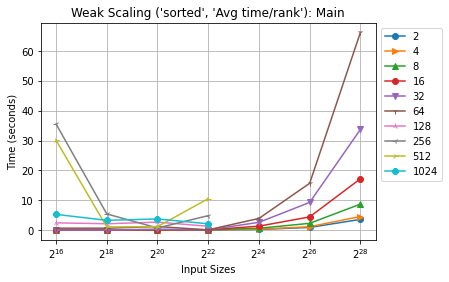

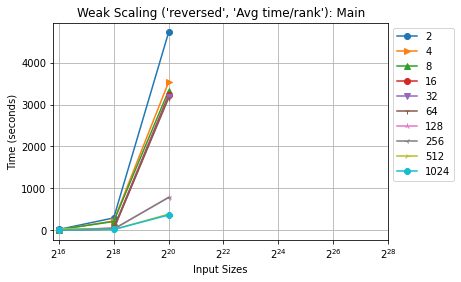

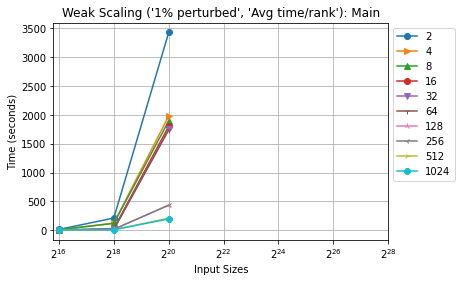

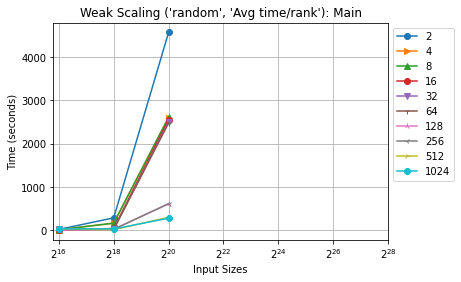

In [22]:
i = 0
for ctk in allctk:
    plot_mpl_numprocs(
        df=ctk.dataframe[[threads[0]]].loc["main"],
        df1= ctk.dataframe[[threads[1]]].loc["main"],
        df2= ctk.dataframe[[threads[2]]].loc["main"],
        df3= ctk.dataframe[[threads[3]]].loc["main"],
        df4= ctk.dataframe[[threads[4]]].loc["main"],
        df5= ctk.dataframe[[threads[5]]].loc["main"],
        df6= ctk.dataframe[[threads[6]]].loc["main"],
        df7= ctk.dataframe[[threads[7]]].loc["main"],
        df8= ctk.dataframe[[threads[8]]].loc["main"],
        df9= ctk.dataframe[[threads[9]]].loc["main"],
        title=f"Weak Scaling {sorttypes[i]}: Main",
        xlabel="Input Sizes",
        ylabel="Time (seconds)",
        label1='2',
        label2='4',
        label3='8',
        label4= '16',
        label5= '32',
        label6= '64',
        label7= '128',
        label8= '256',
        label9= '512',
        label10= '1024'
    )
    i += 1

# Plot of 2

In [23]:
# i = 0
# for ctk in allctk:
#     plot_mpl2(
#         df= ctk.dataframe[[temp[1]]].loc["main"],
#         df1= ctk.dataframe[[temp[2]]].loc["main"],
#         title=f"Sorted Weak Scaling {sizes[i]}: Main",
#         xlabel="Threads",
#         ylabel="Time (seconds)",
#         label1='Sample',
#         label2='Merge'
#     )
#     i += 1

## Comp_Large Graphs (for 3 then 2)

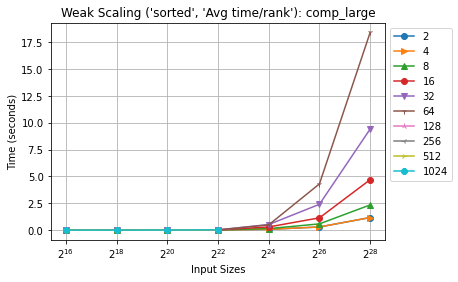

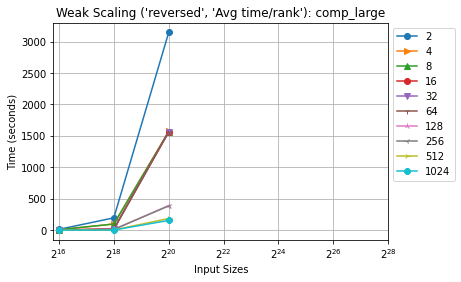

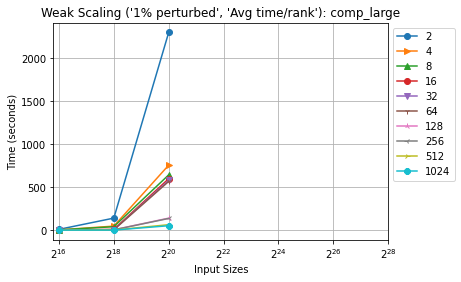

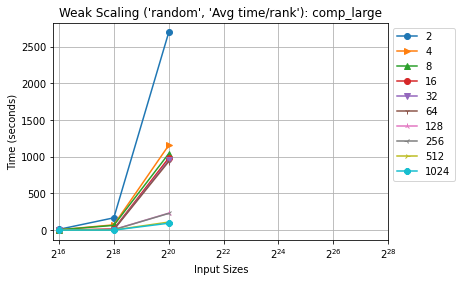

In [24]:
i = 0
for ctk in allctk:
    plot_mpl_numprocs(
        df=ctk.dataframe[[threads[0]]].loc["comp_large"],
        df1= ctk.dataframe[[threads[1]]].loc["comp_large"],
        df2= ctk.dataframe[[threads[2]]].loc["comp_large"],
        df3= ctk.dataframe[[threads[3]]].loc["comp_large"],
        df4= ctk.dataframe[[threads[4]]].loc["comp_large"],
        df5= ctk.dataframe[[threads[5]]].loc["comp_large"],
        df6= ctk.dataframe[[threads[6]]].loc["comp_large"],
        df7= ctk.dataframe[[threads[7]]].loc["comp_large"],
        df8= ctk.dataframe[[threads[8]]].loc["comp_large"],
        df9= ctk.dataframe[[threads[9]]].loc["comp_large"],
        title=f"Weak Scaling {sorttypes[i]}: comp_large",
        xlabel="Input Sizes",
        ylabel="Time (seconds)",
        label1='2',
        label2='4',
        label3='8',
        label4= '16',
        label5= '32',
        label6= '64',
        label7= '128',
        label8= '256',
        label9= '512',
        label10= '1024'
    )
    i += 1

In [25]:
# i = 0
# for ctk in allctk:
#     plot_mpl2(
#         df= ctk.dataframe[[temp[1]]].loc["comp_large"],
#         df1= ctk.dataframe[[temp[2]]].loc["comp_large"],
#         title=f"Sorted Weak Scaling {sizes[i]}: Comp Large",
#         xlabel="Threads",
#         ylabel="Time (seconds)",
#         label1='Sample',
#         label2='Merge'
#     )
#     i += 1

## Comm Graphs (for 3 then 2)

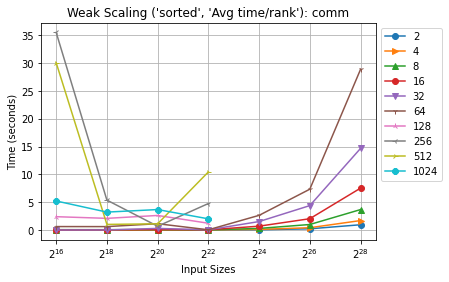

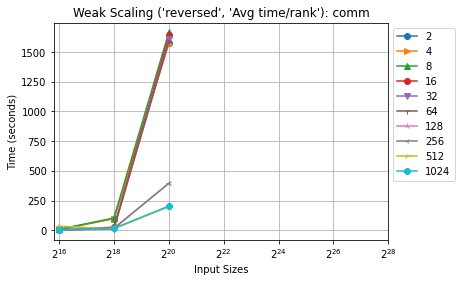

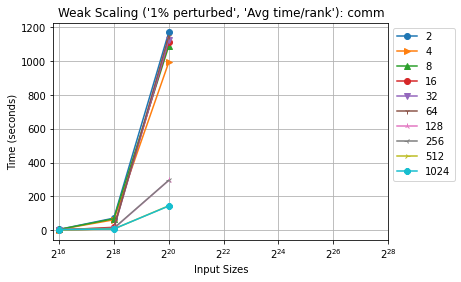

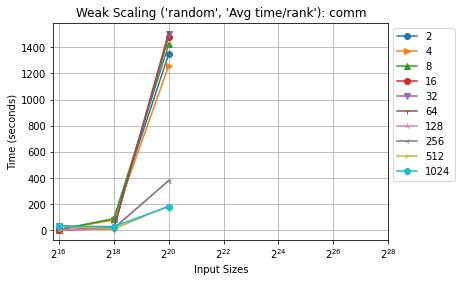

In [26]:
i = 0
for ctk in allctk:
    plot_mpl_numprocs(
        df=ctk.dataframe[[threads[0]]].loc["comm"],
        df1= ctk.dataframe[[threads[1]]].loc["comm"],
        df2= ctk.dataframe[[threads[2]]].loc["comm"],
        df3= ctk.dataframe[[threads[3]]].loc["comm"],
        df4= ctk.dataframe[[threads[4]]].loc["comm"],
        df5= ctk.dataframe[[threads[5]]].loc["comm"],
        df6= ctk.dataframe[[threads[6]]].loc["comm"],
        df7= ctk.dataframe[[threads[7]]].loc["comm"],
        df8= ctk.dataframe[[threads[8]]].loc["comm"],
        df9= ctk.dataframe[[threads[9]]].loc["comm"],
        title=f"Weak Scaling {sorttypes[i]}: comm",
        xlabel="Input Sizes",
        ylabel="Time (seconds)",
        label1='2',
        label2='4',
        label3='8',
        label4= '16',
        label5= '32',
        label6= '64',
        label7= '128',
        label8= '256',
        label9= '512',
        label10= '1024'
    )
    i += 1